### Overview
Quick EDA on hourly crypto data from June 1 - August 25th, finding correlated stocks

1. Aggregates Log Return data for all stocks into a single df
2. Finds top correlated stocks
3. Plots correlation matrix
4. Plots stock price of some of the more correlated stocks

In [7]:
""" 
Imports
"""

import glob
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import re
import matplotlib.pyplot as plt
import seaborn as sns

files = glob.glob("../data/*USDT.csv")
len(files)

0

In [ ]:
"""
DONT RUN

Get all stock data into a single df, from data gathered using Gio code
Pull out df's for log returns, and for open prices across all stocks

Data is from June 1 - Aug 25, hourly
"""

# Don't run now, its gone
stocksDf = pd.DataFrame()

for file in files:
    df = pd.read_csv(file)
    if len(df) == 0: continue
    ticker = re.search(r'([^/]+)\.csv$', file).group(1)

    todayPrices = df['open'][:-1]
    yesterdayPrices = df.shift(-1)['open']
    df['logReturns'] = np.log(todayPrices/yesterdayPrices)
    df = df.set_index('time')
    df.rename(columns= lambda name : ticker + f"_{name}", inplace=True)

    if stocksDf.empty: stocksDf = df
    else: stocksDf = stocksDf.merge(df, on='time', how='outer')

display(stocksDf.head())

In [2]:
""" 
Stocks df is already saved to hourlyData.csv now,
    and original Gio data is deleted
    + only tickers ending with USDT saved

Loads data from saved csv
"""

stocksDf = pd.read_csv('./hourlyData.csv')

stocksDf = stocksDf.set_index('time')
stocksDf = stocksDf.dropna(how='all', axis=0)
stocksDf = stocksDf.dropna(how='all', axis=1)
# stocksDf = stocksDf.drop(index=stocksDf.index[0])
display(stocksDf.head())

returnsDf, opensDf = stocksDf.filter(regex='_logReturns$'), stocksDf.filter(regex='_open$')
returnsDf.columns = returnsDf.columns.str.replace('_logReturns$', '', regex=True)
opensDf.columns = opensDf.columns.str.replace('_open$', '', regex=True)
display(returnsDf.head())
display(opensDf.head())

,APEUSDT_open,APEUSDT_high,APEUSDT_low,APEUSDT_close,APEUSDT_volume,APEUSDT_turnover,APEUSDT_logReturns,MOVRUSDT_open,MOVRUSDT_high,MOVRUSDT_low,...,BATUSDT_volume,BATUSDT_turnover,BATUSDT_logReturns,CKBUSDT_open,CKBUSDT_high,CKBUSDT_low,CKBUSDT_close,CKBUSDT_volume,CKBUSDT_turnover,CKBUSDT_logReturns
time,,,,,,,,,,,,,,,,,,,,,
2024-06-01 01:00:00,1.2487,1.2506,1.2444,1.2463,54272.8,67699.76183,0.002405,14.595,14.661,14.545,...,77616.5,18815.23766,-0.001238,0.016005,0.016049,0.015940,0.015985,12169510.0,194357.78728,-0.000250
2024-06-01 02:00:00,1.2463,1.2494,1.2419,1.2482,295801.6,368765.27968,-0.001924,14.586,14.652,14.553,...,18987.2,4594.23370,0.001651,0.015985,0.016098,0.015977,0.016080,6765880.0,108494.43904,-0.001250
2024-06-01 03:00:00,1.2482,1.2483,1.2426,1.2456,153778.5,191568.59771,0.001523,14.635,14.655,14.545,...,33595.1,8106.01595,-0.002891,0.016080,0.016090,0.015978,0.015997,4355000.0,69754.23305,0.005925
2024-06-01 04:00:00,1.2456,1.2528,1.2427,1.2523,126895.9,158266.73547,-0.002085,14.553,14.612,14.529,...,43252.9,10425.94498,-0.002899,0.015997,0.016085,0.015977,0.016025,7846510.0,125744.98704,-0.005175
2024-06-01 05:00:00,1.2523,1.2532,1.2462,1.2518,168156.5,210079.31403,0.005365,14.576,14.597,14.507,...,39219.6,9457.97184,0.001244,0.016025,0.016029,0.015898,0.015932,8694200.0,138656.90765,0.001749


,APEUSDT,MOVRUSDT,LAIUSDT,RUNEUSDT,PROMUSDT,JOEUSDT,ALPHAUSDT,NFPUSDT,NKNUSDT,BLZUSDT,...,BEAMUSDT,VRAUSDT,KLAYUSDT,SPECUSDT,AGLDUSDT,PAXGUSDT,SFPUSDT,DEGENUSDT,BATUSDT,CKBUSDT
time,,,,,,,,,,,,,,,,,,,,,
2024-06-01 01:00:00,0.002405,0.008049,0.005256,-0.004139,0.006441,-0.002893,0.011627,-0.005115,0.006598,-0.001275,...,-0.014525,-0.000575,-0.000479,0.033222,0.000298,0.000428,0.000620,0.009205,-0.001238,-0.000250
2024-06-01 02:00:00,-0.001924,-0.000617,-0.006905,0.001326,-0.004596,-0.002471,0.018813,-0.004569,-0.012657,-0.002076,...,-0.004798,-0.003459,0.012381,-0.047362,-0.000372,-0.000428,-0.001241,0.014725,0.001651,-0.001250
2024-06-01 03:00:00,0.001523,0.003354,-0.001651,-0.001824,-0.000092,0.000860,-0.028468,-0.007469,0.002162,0.000759,...,0.022729,0.004034,-0.000473,-0.008993,0.006165,-0.000429,-0.000994,0.004290,-0.002891,0.005925
2024-06-01 04:00:00,-0.002085,-0.005619,-0.004637,-0.006662,0.000000,-0.003229,-0.014813,-0.009270,-0.002912,-0.000999,...,-0.006758,-0.001343,0.000000,-0.009937,0.007745,0.000429,-0.002239,-0.017272,-0.002899,-0.005175
2024-06-01 05:00:00,0.005365,0.001579,0.004637,0.008984,0.000369,0.002262,0.001460,0.013107,0.004406,0.004307,...,0.004622,0.002493,0.006136,0.000934,0.003008,-0.000857,-0.000498,0.022821,0.001244,0.001749


,APEUSDT,MOVRUSDT,LAIUSDT,RUNEUSDT,PROMUSDT,JOEUSDT,ALPHAUSDT,NFPUSDT,NKNUSDT,BLZUSDT,...,BEAMUSDT,VRAUSDT,KLAYUSDT,SPECUSDT,AGLDUSDT,PAXGUSDT,SFPUSDT,DEGENUSDT,BATUSDT,CKBUSDT
time,,,,,,,,,,,,,,,,,,,,,
2024-06-01 01:00:00,1.2487,14.595,0.03052,6.027,10.903,0.46600,0.13322,0.5265,0.12165,0.25079,...,0.029459,0.005213,0.2087,14.873,1.3427,2335.0,0.8065,0.02292,0.2421,0.016005
2024-06-01 02:00:00,1.2463,14.586,0.03031,6.035,10.853,0.46485,0.13575,0.5241,0.12012,0.25027,...,0.029318,0.005195,0.2113,14.185,1.3422,2334.0,0.8055,0.02326,0.2425,0.015985
2024-06-01 03:00:00,1.2482,14.635,0.03026,6.024,10.852,0.46525,0.13194,0.5202,0.12038,0.25046,...,0.029992,0.005216,0.2112,14.058,1.3505,2333.0,0.8047,0.02336,0.2418,0.016080
2024-06-01 04:00:00,1.2456,14.553,0.03012,5.984,10.852,0.46375,0.13000,0.5154,0.12003,0.25021,...,0.029790,0.005209,0.2112,13.919,1.3610,2334.0,0.8029,0.02296,0.2411,0.015997
2024-06-01 05:00:00,1.2523,14.576,0.03026,6.038,10.856,0.46480,0.13019,0.5222,0.12056,0.25129,...,0.029928,0.005222,0.2125,13.932,1.3651,2332.0,0.8025,0.02349,0.2414,0.016025


In [3]:
"""
Look at the most correlated stocks based on log-returns
Find the top pairs
"""

matrix = returnsDf.corr()
mask = np.tril(np.ones(matrix.shape)).astype(bool)
# .mask method: keeps whatever is False (opposite of pd.where)
matrix = matrix.mask(mask)

topCorr = matrix.unstack()
topCorr = topCorr.sort_values(ascending=False)
topCorr.head()

SANDUSDT  MANAUSDT    0.943614
          GMTUSDT     0.903242
AXSUSDT   SANDUSDT    0.900650
SANDUSDT  APEUSDT     0.898259
          ZILUSDT     0.895971
dtype: float64

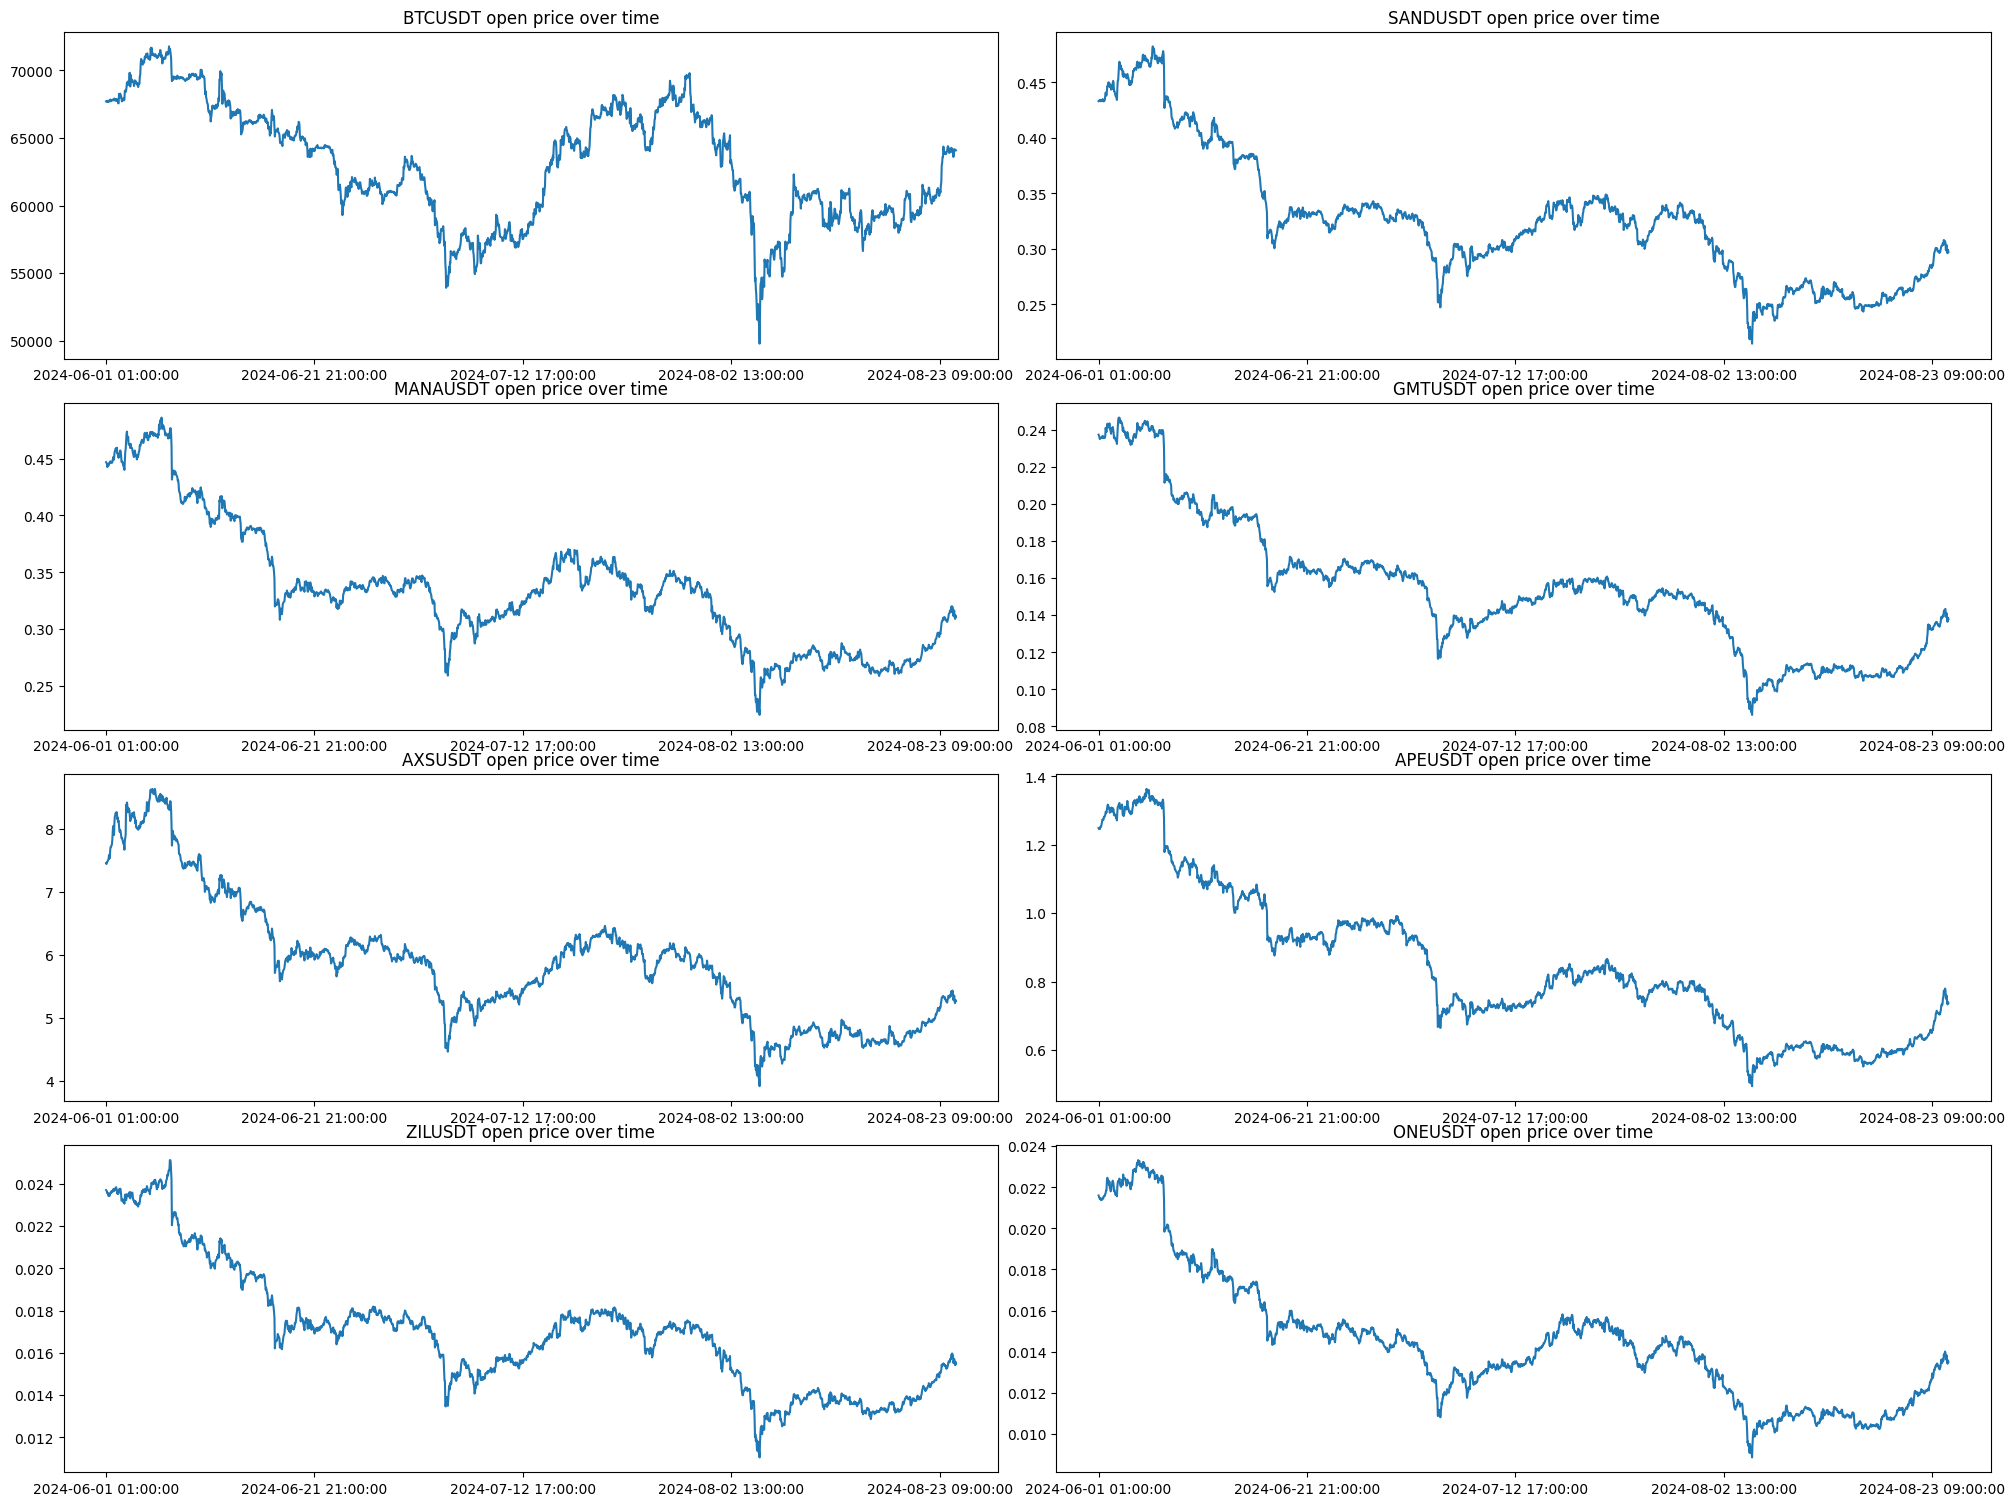

In [4]:
"""
Graph the stock price of some stocks involved in the top pairs
"""
from matplotlib.ticker import MaxNLocator

# Get the unique stocks from the top 6 pairs and BTC (top 6 pairs = 12 stocks, but repeats are removed)
topPairs = topCorr.index
numPairs = 6
exStocks = list(dict.fromkeys(['BTCUSDT'] + [stock for pair in topPairs[:numPairs].tolist() for stock in pair]))

# Setup up figure
numCols = 2
rows = (len(exStocks)+numCols-1)//numCols
fig, axs = plt.subplots(rows, numCols)
fig.set_figwidth(20)
fig.set_figheight(15)
fig.tight_layout()

# Graph stocks open prices by time
for index, stock in enumerate(exStocks):
    r, c = index//numCols, index % numCols
    currAx = axs[r, c] if rows > 1 else axs[c]
    currAx.plot(opensDf.index, opensDf[stock])
    currAx.set_title(stock + " open price over time")
    currAx.xaxis.set_major_locator(MaxNLocator(nbins=5))

<Axes: >

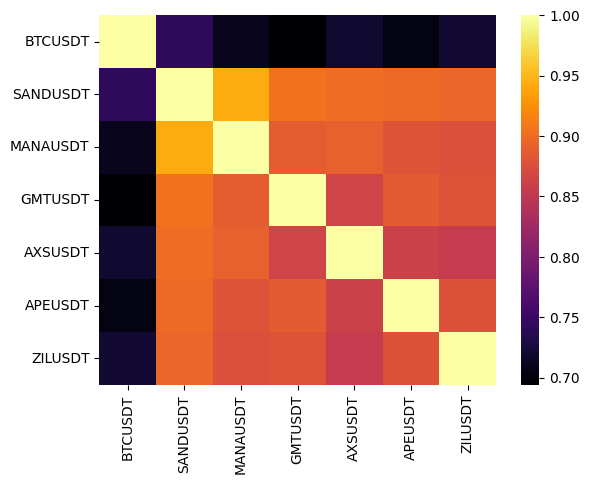

In [5]:
"""
Show correlation values of some of the top correlated stocks + BTC
"""

topCorrStocks = dict.fromkeys(['BTCUSDT'])
index = 0
while len(topCorrStocks) < 7 and index < len(topPairs):
    topCorrStocks |= dict.fromkeys([stock for stock in topPairs[index]])
    index += 1


corrMatrix = returnsDf[list(topCorrStocks)].corr()
sns.heatmap(corrMatrix, cmap='inferno')

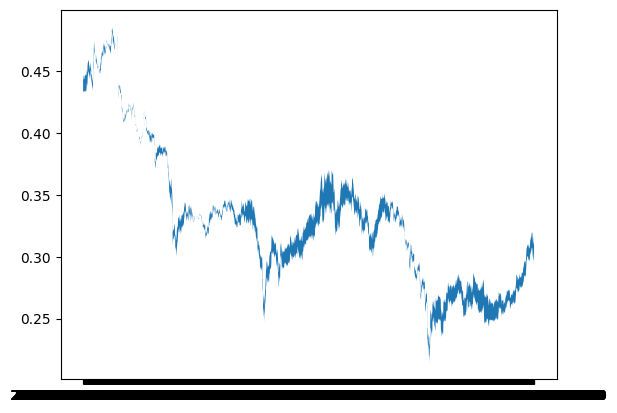

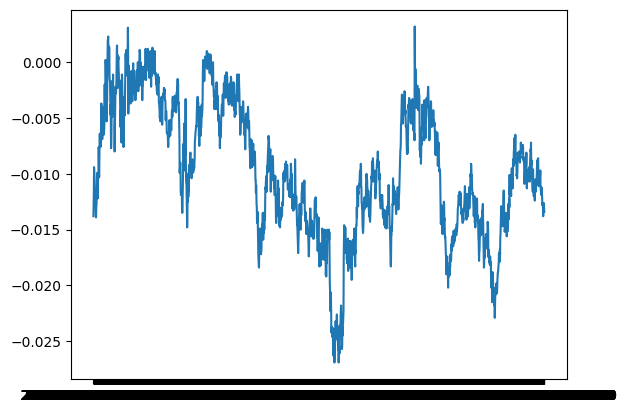

In [6]:
""" 
Why do SAND and MANA log returns look lowkey the exact same?
Plot dif
"""
plt.fill_between(opensDf.index, opensDf['SANDUSDT'], opensDf['MANAUSDT'])
plt.show()
plt.plot(opensDf.index, opensDf['SANDUSDT'] - opensDf['MANAUSDT'])
plt.show()